In [2]:
from ConvertToAudio import ConvertToAudio
from TestingMetrics import EvaluationMetrics
import json
import torch
import pandas as pd

In [27]:
def load_model(model, config: JsonParser):
    model.load_state_dict(torch.load(config.get_saved_model()))
    return model


def denoise_audio_files(config: JsonParser, device: torch.device):
    print('=> Denoising Audio')
    model = config.get_model(device, gpu=False)
    model = load_model(model, config)
    convert = ConvertToAudio(model, config.get_combined_audio(), config.get_clean_audio())
    convert.to_log_spectrogram()
    convert.feed_into_model()
    clean_audio = convert.apply_griffin(phase_scale=False)
    sf.write(config.get_denoised_audio(), clean_audio, 11025, 'PCM_24')

In [5]:
def test_sound_quality(config: JsonParser):
    print('=> Saving test statistics')
    evaluate: EvaluationMetrics = EvaluationMetrics(clean_path=config.get_clean_audio(),
                                                    denoised_path=config.get_denoised_audio(),
                                                    combined_path=config.get_combined_audio(), sr=11025)
    return evaluate.SNR(), evaluate.SDR(), evaluate.PESQ(), evaluate.STOI()

In [6]:
config: JsonParser = JsonParser('config_files/experiment1.json')
snr, sdr, pesq, stoi=test_sound_quality(config)

=> Saving test statistics


In [79]:
results_path='/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/results.csv'
df_results = pd.read_csv(results_path)
df_results

,Experiment,Model,Optimizer,Loss,Epochs,SNR,SDR,PESQ,STOI
0,experiment1.json,ConvAutoEncoder,Adam,MSELoss,2,-0.298966,-14.076052,1.359673,0.511757


In [12]:
df_new = pd.DataFrame({'Experiment': ['experiment2.json'], 'Model': [config.get_model_name()],
                       'Optimizer': [config.get_optimizer_name()], 'Loss': [config.get_loss_name()],
                       'Epochs': [config.get_epochs()], 'Spectrograms': [config.get_spectrograms()],
                       'SNR': [snr], 'SDR': [sdr],
                       'PESQ': [pesq], 'STOI': [stoi]})
df_new

,Experiment,Model,Optimizer,Loss,Epochs,Spectrograms,SNR,SDR,PESQ,STOI
0,experiment2.json,ConvAutoEncoder,Adam,MSELoss,1,2000,-0.298966,-14.076052,1.359673,0.511757


In [81]:
df_save = df_results.append(df_new, ignore_index=True)
df_save

,Experiment,Model,Optimizer,Loss,Epochs,SNR,SDR,PESQ,STOI
0,experiment1.json,ConvAutoEncoder,Adam,MSELoss,2,-0.298966,-14.076052,1.359673,0.511757
1,experiment2.json,ConvAutoEncoder,Adam,MSELoss,2,-0.298966,-14.076052,1.359673,0.511757


In [82]:
df_save.to_csv('/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/results.csv', index=False)

In [14]:
results_path='/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/test.csv'
df_results = pd.read_csv(results_path)
df_results

,Experiment,Model,Optimizer,Loss,Epochs,Spectrograms,SNR,SDR,PESQ,STOI
0,experiment1.json,ConvAutoEncoder,Adam,MSELoss,1,2000,-0.298966,-14.076052,1.359673,0.511757


In [15]:
df_new = pd.DataFrame({'Experiment': ['experiment3.json'], 'Model': [config.get_model_name()],
                       'Optimizer': [config.get_optimizer_name()], 'Loss': [config.get_loss_name()],
                       'Epochs': [config.get_epochs()], 'Spectrograms': [config.get_spectrograms()],
                       'SNR': [snr], 'SDR': [sdr],
                       'PESQ': [pesq], 'STOI': [stoi]})
df_new

,Experiment,Model,Optimizer,Loss,Epochs,Spectrograms,SNR,SDR,PESQ,STOI
0,experiment3.json,ConvAutoEncoder,Adam,MSELoss,1,2000,-0.298966,-14.076052,1.359673,0.511757


In [17]:
df_testing = df_results.append(df_new, ignore_index=True)
df_testing

,Experiment,Model,Optimizer,Loss,Epochs,Spectrograms,SNR,SDR,PESQ,STOI
0,experiment1.json,ConvAutoEncoder,Adam,MSELoss,1,2000,-0.298966,-14.076052,1.359673,0.511757
1,experiment3.json,ConvAutoEncoder,Adam,MSELoss,1,2000,-0.298966,-14.076052,1.359673,0.511757


In [18]:
df_testing.to_csv('/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/test.csv', index=False)

In [32]:
def save_to_dataframe(path: str):
    df_results = pd.read_csv(results_path)
    df_new = pd.DataFrame({'Experiment': [config.get_experiment_name()], 'Model': [config.get_model_name()],
                       'Optimizer': [config.get_optimizer_name()], 'Loss': [config.get_loss_name()],
                       'Epochs': [config.get_epochs()], 'Spectrograms': [config.get_spectrograms()],
                       'SNR': [snr], 'SDR': [sdr],
                       'PESQ': [pesq], 'STOI': [stoi]})
    df_save = df_results.append(df_new, ignore_index=True)
    df_save.to_csv(path, index=False)

In [33]:
save_to_dataframe('/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/test.csv')

AttributeError: 'JsonParser' object has no attribute 'get_experiment_name'

In [ ]:
df_results = pd.read_csv('/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/results.csv')
    df_new = pd.DataFrame({'Experiment': ['experiment2.json'], 'Model': [config.get_model_name()],
                           'Optimizer': [config.get_optimizer_name()], 'Loss': [config.get_loss_name()],
                           'Epochs': [config.get_epochs()], 'SNR': [evaluate.SNR()], 'SDR': [evaluate.SDR()],
                           'PESQ': [evaluate.PESQ()], 'STOI': [evaluate.STOI()]})
    df_save = df_results.append(df_new, ignore_index=True)
    df_save.to_csv('/home/braden/Environments/Research/Audio/Research(Refactored)/Test_Results/results.csv',
                   index=False)

In [30]:
import librosa
import numpy
import os
from natsort import natsorted
from typing import List, Set, Dict, Tuple, Optional
import numpy as np
import matplotlib.pyplot as plt

Noisy shape: (129, 4936) Clean shape: (129, 617)


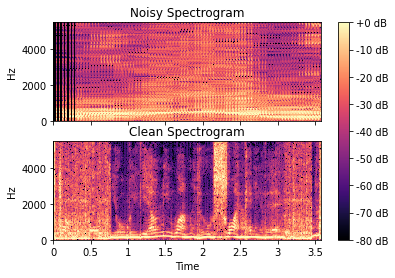

In [71]:
def show_spectrogram(noisy, clean) -> None:
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

    img = librosa.display.specshow(librosa.amplitude_to_db(noisy, ref=np.max), y_axis='linear',
                                   x_axis='time',
                                   ax=ax[0], sr=11025, hop_length=round(256 * 0.25))
    ax[0].set_title('Noisy Spectrogram')
    ax[0].label_outer()

    img = librosa.display.specshow(librosa.amplitude_to_db(clean, ref=np.max), y_axis='linear',
                                   x_axis='time',
                                   ax=ax[1], sr=11025, hop_length=round(256 * 0.25))
    ax[1].set_title('Clean Spectrogram')
    ax[1].label_outer()

    fig.colorbar(img, ax=ax, format="%+2.0f dB")


def get_spectrograms(audio: List[str], path: str, frame_start: int, frame_end: int):
    noisy, clean=np.load(path+audio[0], allow_pickle=True)
    noisy=noisy[1:, :]
    for i in range(frame_start, frame_end):        
        t_noisy, t_clean=np.load(path+audio[i], allow_pickle=True)
        t_noisy = t_noisy[1:, :]
        noisy=np.concatenate((noisy, t_noisy), axis=1)
        clean=np.concatenate((clean, t_clean), axis=1)
    print(f'Noisy shape: {noisy.shape} Clean shape: {clean.shape}')
    show_spectrogram(noisy, clean)
    
    
data=natsorted(os.listdir('/home/braden/Environments/Research/Audio/Research(Refactored)/Data/training/810/800'))
get_spectrograms(data, '/home/braden/Environments/Research/Audio/Research(Refactored)/Data/training/810/800/'
                        , 1, 617)

/tmp/ipykernel_78122/2728443636.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)


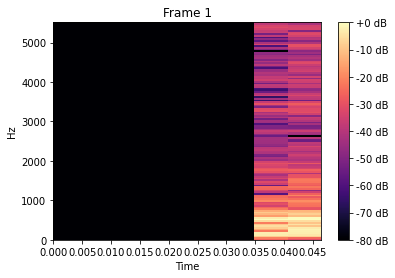

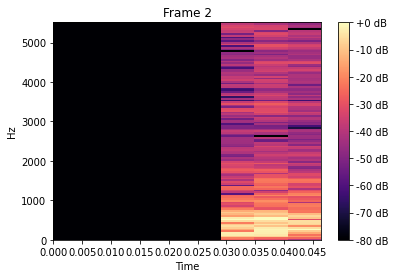

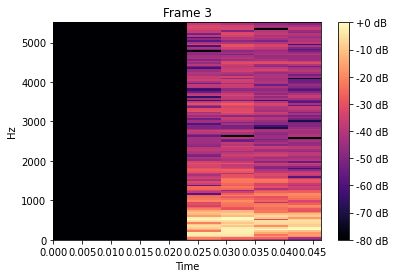

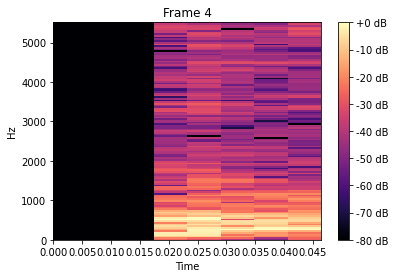

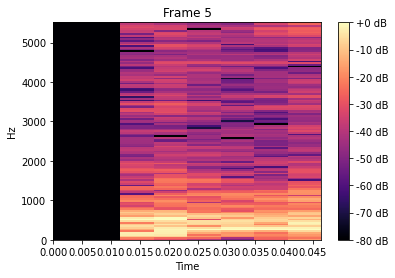

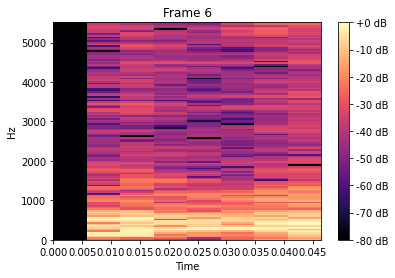

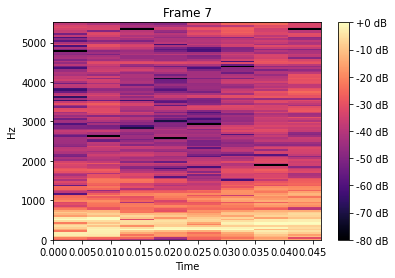

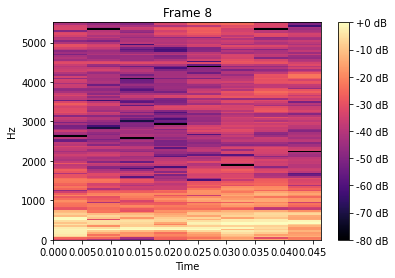

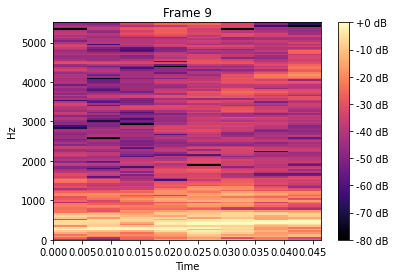

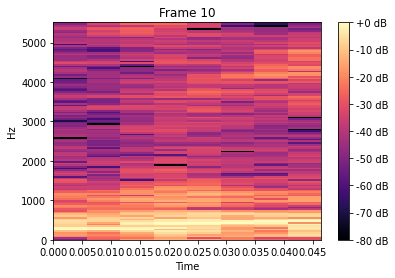

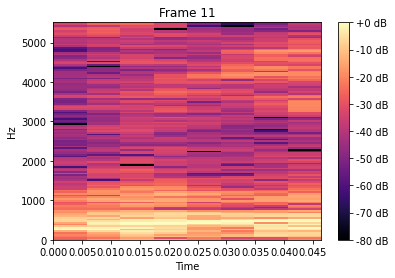

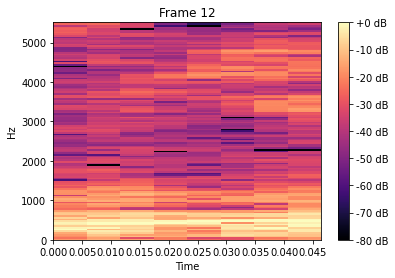

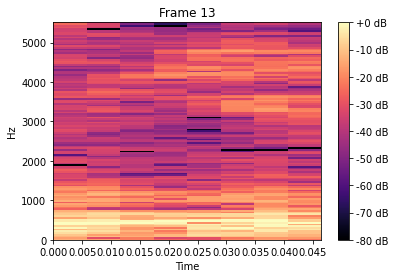

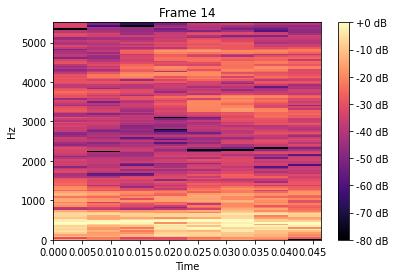

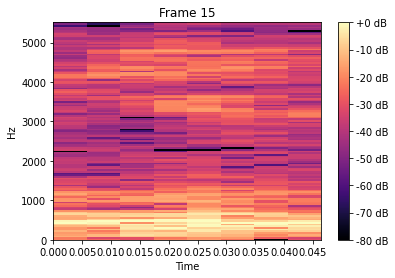

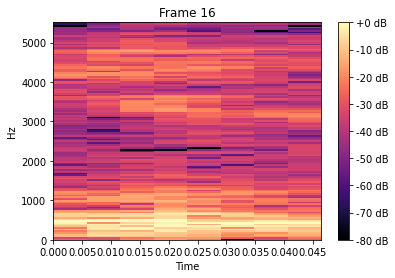

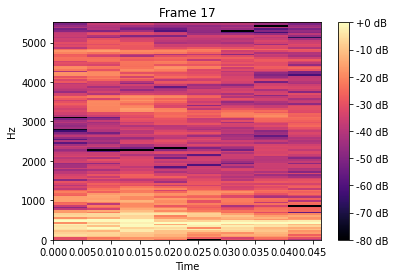

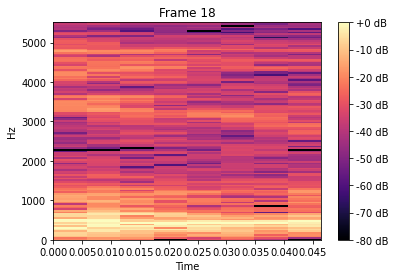

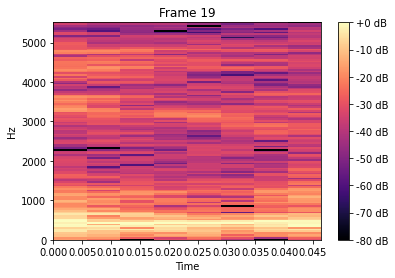

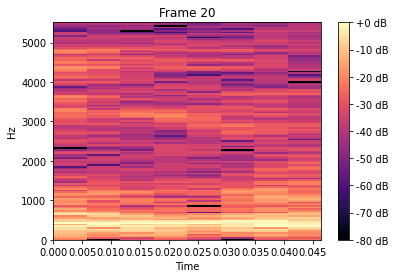

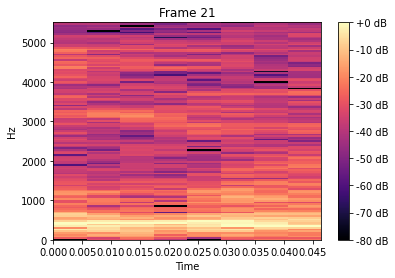

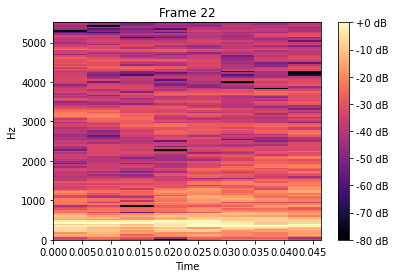

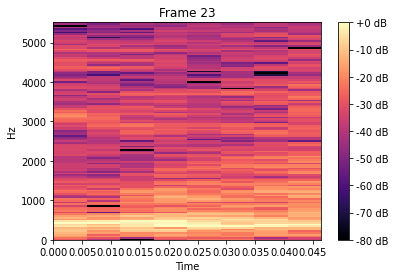

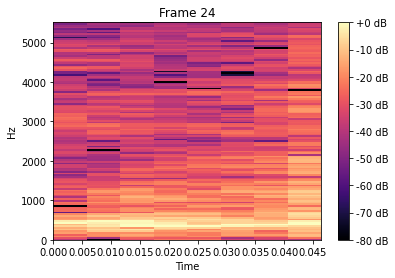

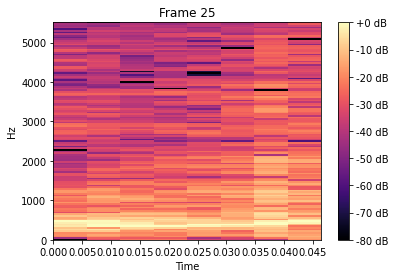

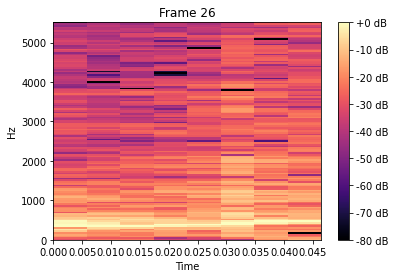

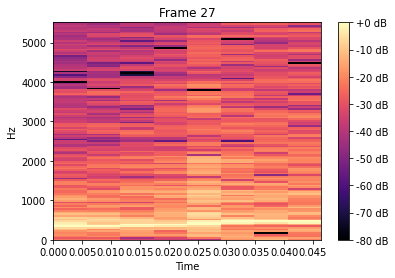

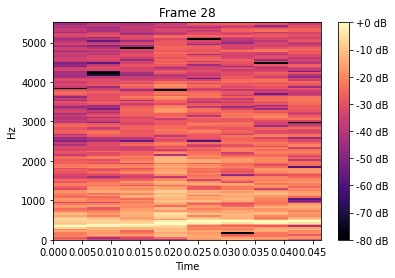

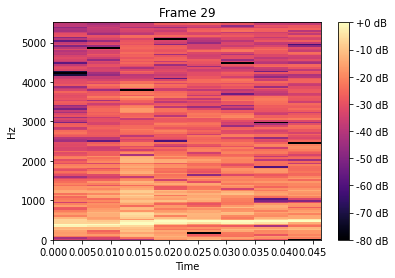

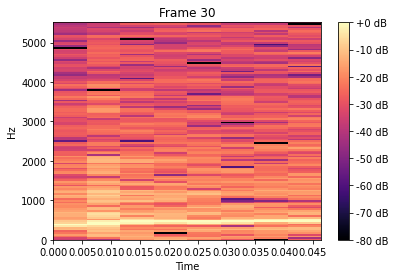

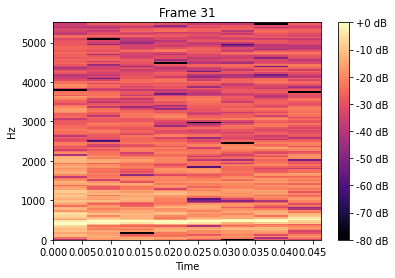

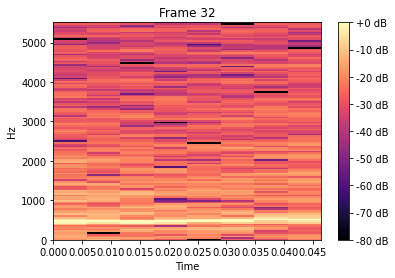

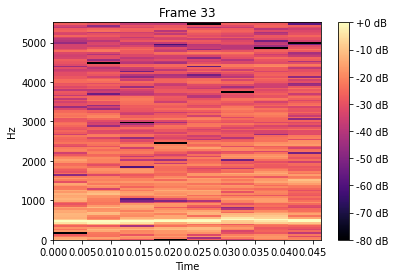

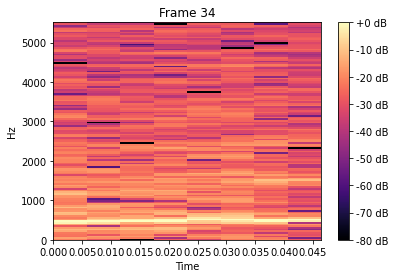

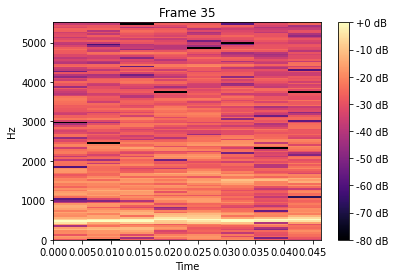

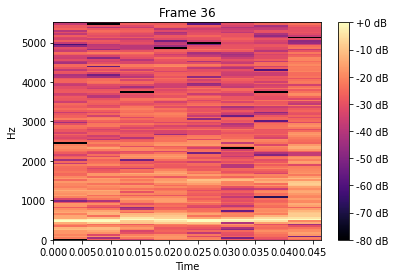

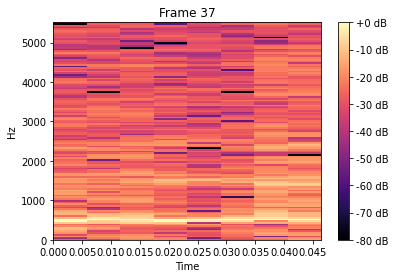

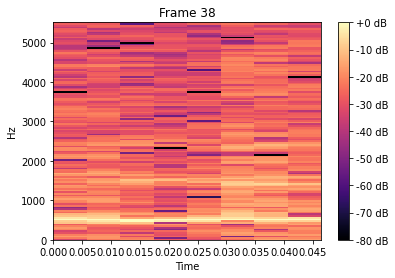

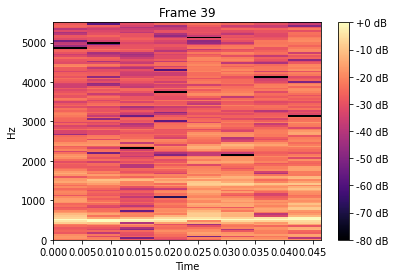

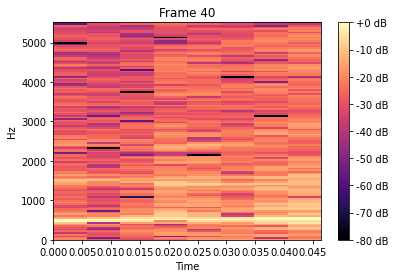

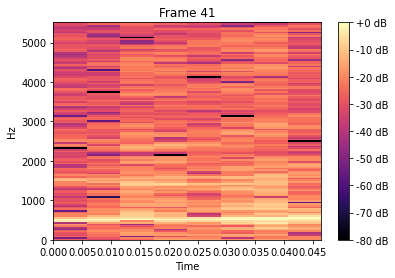

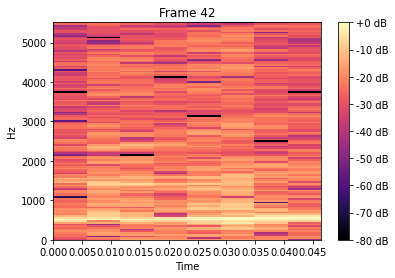

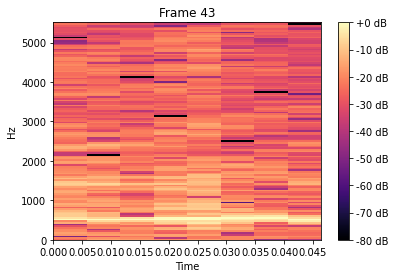

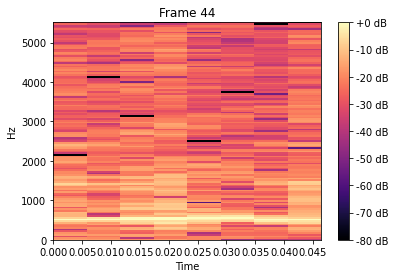

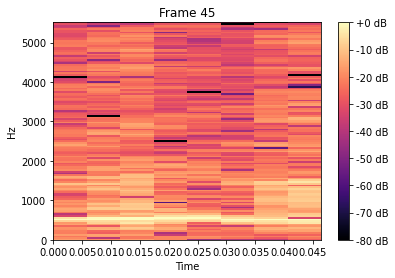

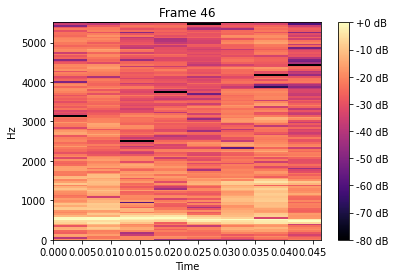

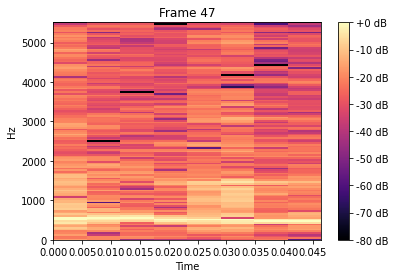

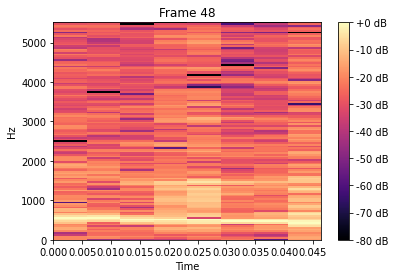

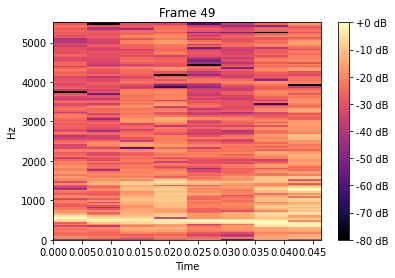

In [69]:
def show_spectrogram_noisy(noisy, i) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

    img = librosa.display.specshow(librosa.amplitude_to_db(noisy, ref=np.max), y_axis='linear',
                                   x_axis='time',
                                   ax=ax, sr=11025, hop_length=round(256 * 0.25))
    ax.set_title(f'Frame {i}')
    ax.label_outer()


    fig.colorbar(img, ax=ax, format="%+2.0f dB")


def get_spectrograms_noisy(audio: List[str], path: str, frame_start: int, frame_end: int):
    noisy, clean=np.load(path+audio[0], allow_pickle=True)
    noisy=noisy[1:, :]
    for i in range(frame_start, frame_end):        
        t_noisy, t_clean=np.load(path+audio[i], allow_pickle=True)
        t_noisy = t_noisy[1:, :]
        show_spectrogram_noisy(t_noisy, i)
    
    
data=natsorted(os.listdir('/home/braden/Environments/Research/Audio/Research(Refactored)/Data/training/810/800'))
get_spectrograms_noisy(data, '/home/braden/Environments/Research/Audio/Research(Refactored)/Data/training/810/800/'
                        , 1, 50)